In [1]:
import pandas as pd

In [2]:
df_age = pd.read_csv('age-brackets-export.csv')

In [3]:
df_age_upper = df_age[df_age['Chamber type'] .isin(["Upper chamber"])]
df_age_upper.head(3)

,ISO Code,Country,Chamber,Structure of parliament,Chamber type,Last election,First session,Average age,% 30 or under,% 40 or under,% 45 or under
2,DZ,Algeria,Council of the Nation,Bicameral,Upper chamber,5-Feb-22,NaN,NaN,0.00,11.18,26.47
6,AG,Antigua and Barbuda,Senate,Bicameral,Upper chamber,17-Feb-23,17-Feb-23,53.97,5.88,29.41,35.29
8,AR,Argentina,Senate,Bicameral,Upper chamber,14-Nov-21,10-Dec-21,57.00,0.00,6.94,12.50


In [4]:
df_age_lower = df_age[df_age['Chamber type'] .isin(["Lower chamber"])]
df_age_lower.head(3)

,ISO Code,Country,Chamber,Structure of parliament,Chamber type,Last election,First session,Average age,% 30 or under,% 40 or under,% 45 or under
1,DZ,Algeria,National People's Assembly,Bicameral,Lower chamber,12-Jun-21,8-Jul-21,46.72,3.69,30.71,46.44
5,AG,Antigua and Barbuda,House of Representatives,Bicameral,Lower chamber,18-Jan-23,17-Feb-23,NaN,0.00,11.11,22.22
7,AR,Argentina,Chamber of Deputies,Bicameral,Lower chamber,14-Nov-21,10-Dec-21,NaN,1.20,15.20,30.80


In [5]:
df_age_uni = df_age[df_age['Structure of parliament'] .isin(["Unicameral"])]
df_age_uni["Chamber type"] = "unicameral"
df_age_uni.head(3)

/var/folders/mq/lxjs0zhd4tv04f28vq_hdwd80000gn/T/ipykernel_29850/3743556861.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_age_uni["Chamber type"] = "unicameral"


,ISO Code,Country,Chamber,Structure of parliament,Chamber type,Last election,First session,Average age,% 30 or under,% 40 or under,% 45 or under
0,AL,Albania,Parliament,Unicameral,unicameral,25-Apr-21,10-Sep-21,NaN,NaN,NaN,NaN
3,AD,Andorra,General Council,Unicameral,unicameral,2-Apr-23,26-Apr-23,45.25,3.57,35.71,46.43
4,AO,Angola,National Assembly,Unicameral,unicameral,24-Aug-22,16-Sep-22,NaN,NaN,NaN,NaN


In [6]:
df_age_nonupper = pd.concat([df_age_lower, df_age_uni])
df_age_nonupper.head(3)

,ISO Code,Country,Chamber,Structure of parliament,Chamber type,Last election,First session,Average age,% 30 or under,% 40 or under,% 45 or under
1,DZ,Algeria,National People's Assembly,Bicameral,Lower chamber,12-Jun-21,8-Jul-21,46.72,3.69,30.71,46.44
5,AG,Antigua and Barbuda,House of Representatives,Bicameral,Lower chamber,18-Jan-23,17-Feb-23,NaN,0.00,11.11,22.22
7,AR,Argentina,Chamber of Deputies,Bicameral,Lower chamber,14-Nov-21,10-Dec-21,NaN,1.20,15.20,30.80


In [7]:
df_electoral_nonupper = pd.read_csv('chamber_electoral_system.csv')

In [8]:
df_electoral_upper = pd.read_csv('chamber_electoral_system_upper.csv')

In [9]:
df_merged_nonupper = pd.merge(df_age_nonupper, df_electoral_nonupper, how='left', left_on=['Country','Chamber'], right_on = ['Country','Chamber'])

In [10]:
df_merged_upper = pd.merge(df_age_upper, df_electoral_upper, how='left', left_on=['Country','Chamber'], right_on = ['Country','Chamber'])

In [11]:
df_merged = pd.concat([df_merged_nonupper, df_merged_upper])
df_merged = df_merged.rename(columns={'ISO Code': 'ISO_A2'})

In [12]:
df_merged.to_csv('PM_age_election_merged.csv')

In [13]:
df_40_sorted = df_merged.sort_values(by='% 40 or under', ascending=False)
df_40_sorted.head(5)

,ISO_A2,Country,Chamber,Structure of parliament,Chamber type_x,Last election,First session,Average age,% 30 or under,% 40 or under,% 45 or under,ISO code,Electoral system,Structure,Chamber type_y
81,AM,Armenia,National Assembly,Unicameral,unicameral,20-Jun-21,2-Aug-21,40.02,13.08,52.34,70.09,AM,Proportional representation,Unicameral,NaN
29,ET,Ethiopia,House of Peoples' Representatives,Bicameral,Lower chamber,21 Jun 2021 30 Sep 2021,4-Oct-21,40.46,3.82,51.17,71.13,ET,Plurality/majority,Bicameral,Lower chamber
183,UA,Ukraine,Parliament,Unicameral,unicameral,21-Jul-19,29-Aug-19,NaN,7.09,46.34,63.36,UA,Mixed system,Unicameral,NaN
108,GM,Gambia (The),National Assembly,Unicameral,unicameral,9-Apr-22,14-Apr-22,43.05,5.45,43.64,63.64,GM,Plurality/majority,Unicameral,NaN
12,BO,Bolivia (Plurinational State of),Chamber of Deputies,Bicameral,Lower chamber,18-Oct-20,3-Nov-20,44.30,6.15,42.31,60.00,BO,Mixed system,Bicameral,Lower chamber


In [14]:
df_40_sorted.to_csv('df_40_sorted.csv')

array([[<Axes: title={'center': 'Average age'}>,
        <Axes: title={'center': '% 30 or under'}>],
       [<Axes: title={'center': '% 40 or under'}>,
        <Axes: title={'center': '% 45 or under'}>]], dtype=object)

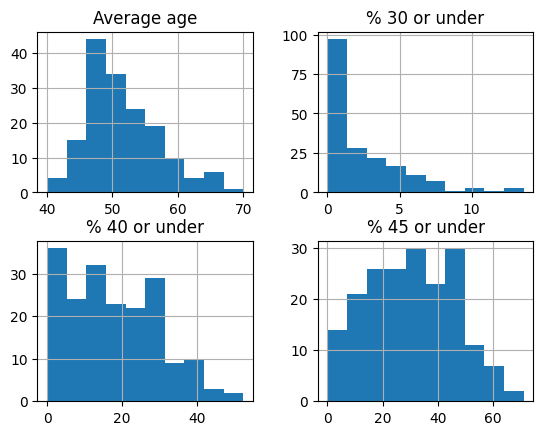

In [15]:
df_merged.hist()

In [16]:
df_country_code = pd.read_csv('country_code.csv')

In [17]:
df_country_code = df_country_code.rename(columns={'alpha-2': 'ISO_A2','alpha-3': 'ISO_A3'})
df_country_code.head(3)

,name,ISO_A2,ISO_A3,country-code,iso_3166-2,region,sub-region,intermediate-region,region-code,sub-region-code,intermediate-region-code
0,Afghanistan,AF,AFG,4,ISO 3166-2:AF,Asia,Southern Asia,NaN,142.0,34.0,NaN
1,Åland Islands,AX,ALA,248,ISO 3166-2:AX,Europe,Northern Europe,NaN,150.0,154.0,NaN
2,Albania,AL,ALB,8,ISO 3166-2:AL,Europe,Southern Europe,NaN,150.0,39.0,NaN


In [18]:
df_code_merged = pd.merge(df_merged, df_country_code, how="left", on = "ISO_A2")
df_code_merged.to_csv('df_code_merged.csv')
df_code_merged.head(3)

,ISO_A2,Country,Chamber,Structure of parliament,Chamber type_x,Last election,First session,Average age,% 30 or under,% 40 or under,...,name,ISO_A3,country-code,iso_3166-2,region,sub-region,intermediate-region,region-code,sub-region-code,intermediate-region-code
0,DZ,Algeria,National People's Assembly,Bicameral,Lower chamber,12-Jun-21,8-Jul-21,46.72,3.69,30.71,...,Algeria,DZA,12,ISO 3166-2:DZ,Africa,Northern Africa,NaN,2.0,15.0,NaN
1,AG,Antigua and Barbuda,House of Representatives,Bicameral,Lower chamber,18-Jan-23,17-Feb-23,NaN,0.00,11.11,...,Antigua and Barbuda,ATG,28,ISO 3166-2:AG,Americas,Latin America and the Caribbean,Caribbean,19.0,419.0,29.0
2,AR,Argentina,Chamber of Deputies,Bicameral,Lower chamber,14-Nov-21,10-Dec-21,NaN,1.20,15.20,...,Argentina,ARG,32,ISO 3166-2:AR,Americas,Latin America and the Caribbean,South America,19.0,419.0,5.0
